In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/sawda/.local/share/virtualenvs/torch-c2AwxiQJ/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
torch.manual_seed(111) 

In [5]:
win = pd.read_csv('winequality-red.csv',sep=';')
win

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [162]:
irisData = pd.read_csv('iris.csv')
iris = irisData['sepal.length']
data = np.array([])
for i in iris:
    data = np.append(data,i)
data
len(data)

150

In [163]:

a = 2 # とりあえずの重みを設定
b = 1 # とりあえずの切片を設定

tensor_x = torch.from_numpy(data)

x = tensor_x.view(150, 1).float() # （1）なぜ 100 x 1のテンソルに変換するのか　100とは何か　1とは何か

eps = torch.randn(150, 1)
y = a * x + b + eps

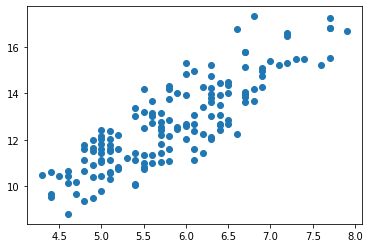

In [164]:
plt.scatter(x,y)

In [176]:
class sawada(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        output = self.linear(x)
        return output

In [177]:
model = sawada()

In [178]:
x_test = torch.tensor([1.0]) 
x_test

tensor([1.])

In [179]:
model(x_test) 

tensor([-1.4472], grad_fn=<AddBackward0>)

In [180]:
x2 = x

In [181]:
x2.size()

torch.Size([150, 1])

In [182]:
y_pred = model(x2)

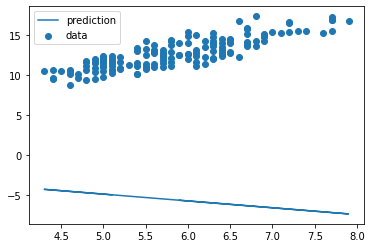

In [183]:
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [184]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [185]:
losses = []
num_epoch = 150
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 340.5968933105469
epoch: 10, loss: 77.84271240234375
epoch: 20, loss: 18.395957946777344
epoch: 30, loss: 4.946420669555664
epoch: 40, loss: 1.903510332107544
epoch: 50, loss: 1.2150468826293945
epoch: 60, loss: 1.0592613220214844
epoch: 70, loss: 1.0239918231964111
epoch: 80, loss: 1.0159885883331299
epoch: 90, loss: 1.0141537189483643
epoch: 100, loss: 1.0137150287628174
epoch: 110, loss: 1.013592004776001
epoch: 120, loss: 1.013540267944336
epoch: 130, loss: 1.0135043859481812
epoch: 140, loss: 1.0134727954864502


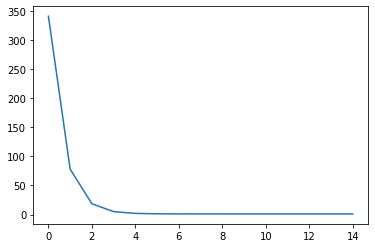

In [186]:
plt.plot(losses)

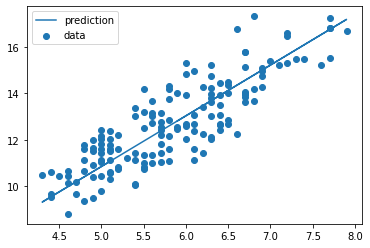

In [187]:
x_test = x
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()